In [81]:
# Extract .json versions of the shape files used for ELR

# XXX How do we know the Ethiopia regions have the correct names?

import numpy as np
import matplotlib.pyplot as plt
import shapefile
import netCDF4 as nc
from shapely.geometry.polygon import Polygon
from shapely.ops import unary_union
import cartopy.io.shapereader as shpreader
import json

In [4]:
output_dir = "../interface/ensemble_logistic_regression/Shapes"

# Load the longitude and latitude from a forecast
nc_file = nc.Dataset("/Users/cooperf/Documents/WFP/Operational/Website/data/GAN_20240521.nc")
latitude = np.array(nc_file["latitude"][:])
longitude = np.array(nc_file["longitude"][:])
nc_file.close()

In [43]:
# Kiambu, Kenya

# Load the shapefile
shapes_file_name = "Kenya_shapes/Kenya_region.shp"
sf = shapefile.Reader(shapes_file_name)

shape_num = 46
print(sf.record(shape_num))

# The name of the region
name = "Kiambu"

# Bounding box of the shape
bbox = sf.shape(shape_num).bbox

# Find the bounding indices
min_lon_idx = np.max(np.nonzero(longitude < bbox[0]))
max_lon_idx = np.min(np.nonzero(longitude > bbox[2]))
min_lat_idx = np.max(np.nonzero(latitude < bbox[1]))
max_lat_idx = np.min(np.nonzero(latitude > bbox[3]))

 # Number of polygons that make up the lake border
num_polys = len(sf.shape(shape_num).parts)

# Loop over all polygons in the shapefile
for poly_num in range(num_polys):
    start_idx = sf.shape(shape_num).parts[poly_num]
    if (poly_num < num_polys-1):
        end_idx = sf.shape(shape_num).parts[poly_num+1]
    else:
        end_idx = None  # Final location is not specified in shape(0).parts.
    polygon = Polygon(sf.shape(shape_num).points[start_idx:end_idx])

# The points in the shapefile
points = np.array(sf.shape(shape_num).points)

# Make a list of the polygons
poly_list = []
for i in range(num_polys-1):
    start_idx = sf.shape(shape_num).parts[i]
    end_idx = sf.shape(shape_num).parts[i+1]
    poly_list.append([points[start_idx:end_idx,0].tolist(), points[start_idx:end_idx,1].tolist()])
# Add the final polygon
poly_list.append([points[end_idx:,0].tolist(), points[end_idx:,1].tolist()])

# Export to .json
x = {
    "name":name,
    "bounding_box":list(bbox),
    "lat_idx":[int(min_lat_idx),int(max_lat_idx)],
    "lon_idx":[int(min_lon_idx),int(max_lon_idx)],
    "line":poly_list
}
#print(json.dumps(x, indent=4))

# Save to a .json text file
# json_file = open(f"{output_dir}/{name}_boundary.json", "w")
# json_file.write(json.dumps(x))
# json_file.close()

Record #46: ['KIAMBU', 0, 'Kenya', 3169.42670532]


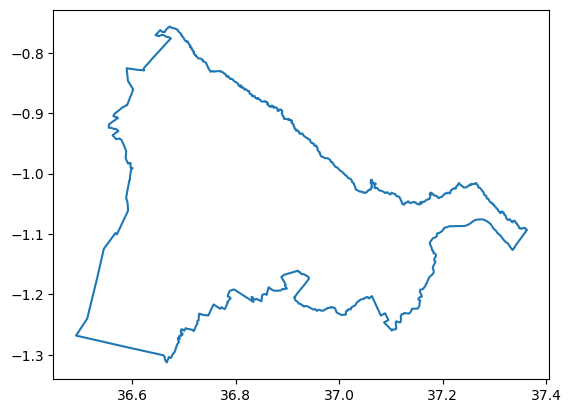

In [50]:
plt.plot(x["line"][0][0],x["line"][0][1])
plt.show()

In [51]:
# Nairobi, Kenya

# Load the shapefile
shapes_file_name = "Kenya_shapes/Kenya_region.shp"
sf = shapefile.Reader(shapes_file_name)

shape_num = 44
print(sf.record(shape_num))

# The name of the region
name = "Nairobi"

# Bounding box of the shape
bbox = sf.shape(shape_num).bbox

# Find the bounding indices
min_lon_idx = np.max(np.nonzero(longitude < bbox[0]))
max_lon_idx = np.min(np.nonzero(longitude > bbox[2]))
min_lat_idx = np.max(np.nonzero(latitude < bbox[1]))
max_lat_idx = np.min(np.nonzero(latitude > bbox[3]))

 # Number of polygons that make up the lake border
num_polys = len(sf.shape(shape_num).parts)

# Loop over all polygons in the shapefile
for poly_num in range(num_polys):
    start_idx = sf.shape(shape_num).parts[poly_num]
    if (poly_num < num_polys-1):
        end_idx = sf.shape(shape_num).parts[poly_num+1]
    else:
        end_idx = None  # Final location is not specified in shape(0).parts.
    polygon = Polygon(sf.shape(shape_num).points[start_idx:end_idx])

# The points in the shapefile
points = np.array(sf.shape(shape_num).points)

# Make a list of the polygons
poly_list = []
for i in range(num_polys-1):
    start_idx = sf.shape(shape_num).parts[i]
    end_idx = sf.shape(shape_num).parts[i+1]
    poly_list.append([points[start_idx:end_idx,0].tolist(), points[start_idx:end_idx,1].tolist()])
# Add the final polygon
poly_list.append([points[end_idx:,0].tolist(), points[end_idx:,1].tolist()])

# Export to .json
x = {
    "name":name,
    "bounding_box":list(bbox),
    "lat_idx":[int(min_lat_idx),int(max_lat_idx)],
    "lon_idx":[int(min_lon_idx),int(max_lon_idx)],
    "line":poly_list
}
#print(json.dumps(x, indent=4))

# Save to a .json text file
# json_file = open(f"{output_dir}/{name}_boundary.json", "w")
# json_file.write(json.dumps(x))
# json_file.close()

Record #44: ['NAIROBI', 0, 'Kenya', 706.541320616]


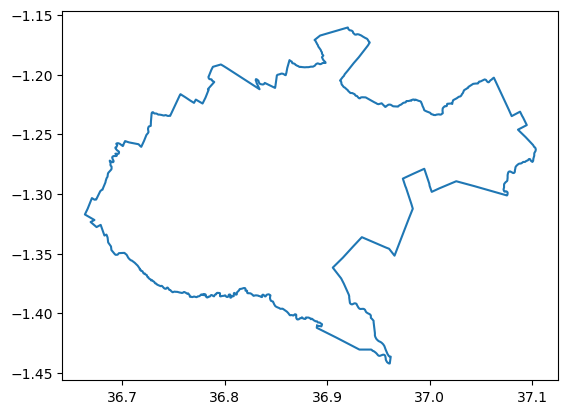

In [52]:
plt.plot(x["line"][0][0],x["line"][0][1])
plt.show()

In [53]:
# Kajiado East, Kenya

# Load the shapefile
shapes_file_name = "Kenya_shapes/subcounties/Kajiado_SubC.shp"
sf = shapefile.Reader(shapes_file_name)

# Kajiado East is shape 1
shape_num = 1

# The name of the region
name = sf.record(shape_num)[6]

# Bounding box of the shape
bbox = sf.shape(shape_num).bbox

# Find the bounding indices
min_lon_idx = np.max(np.nonzero(longitude < bbox[0]))
max_lon_idx = np.min(np.nonzero(longitude > bbox[2]))
min_lat_idx = np.max(np.nonzero(latitude < bbox[1]))
max_lat_idx = np.min(np.nonzero(latitude > bbox[3]))

 # Number of polygons that make up the lake border
num_polys = len(sf.shape(shape_num).parts)

# Loop over all polygons in the shapefile
for poly_num in range(num_polys):
    start_idx = sf.shape(shape_num).parts[poly_num]
    if (poly_num < num_polys-1):
        end_idx = sf.shape(shape_num).parts[poly_num+1]
    else:
        end_idx = None  # Final location is not specified in shape(0).parts.
    polygon = Polygon(sf.shape(shape_num).points[start_idx:end_idx])

# The points in the shapefile
points = np.array(sf.shape(shape_num).points)

# Make a list of the polygons
poly_list = []
for i in range(num_polys-1):
    start_idx = sf.shape(shape_num).parts[i]
    end_idx = sf.shape(shape_num).parts[i+1]
    poly_list.append([points[start_idx:end_idx,0].tolist(), points[start_idx:end_idx,1].tolist()])
# Add the final polygon
poly_list.append([points[end_idx:,0].tolist(), points[end_idx:,1].tolist()])

# Export to .json
x = {
    "name":name,
    "bounding_box":list(bbox),
    "lat_idx":[int(min_lat_idx),int(max_lat_idx)],
    "lon_idx":[int(min_lon_idx),int(max_lon_idx)],
    "line":poly_list
}
#print(json.dumps(x, indent=4))

# Save to a .json text file
# json_file = open(f"{output_dir}/{name}_boundary.json", "w")
# json_file.write(json.dumps(x))
# json_file.close()

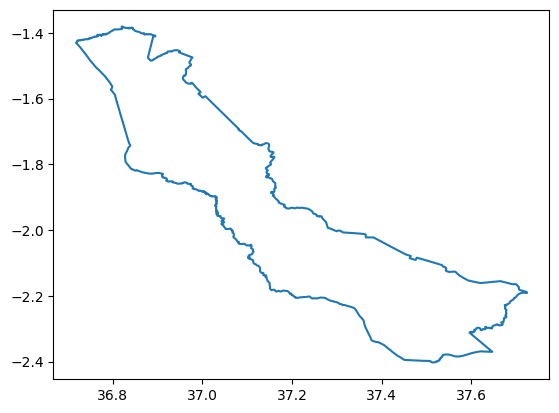

In [54]:
plt.plot(x["line"][0][0],x["line"][0][1])
plt.show()

In [ ]:
# Konso, Ethiopia

# Load the shapefile
shapes_file_name = "Ethiopia_shapes/eth_adm_csa_bofedb_2021_shp/eth_admbnda_adm3_csa_bofedb_2021.shp"
sf = shapefile.Reader(shapes_file_name)

# The name of the region.
name = "Konso"

# XXX According to Shruti's helper_functions.py
features = sf.shapeRecords()
all_shape_nums = []
for i in range(len(features)):
    if (name in features[i].record[7]):
        all_shape_nums.append(i)

# poly_list = []
polygon_all = []
for shape_num in all_shape_nums:
    print(f"shape_num = {shape_num}")

    # Number of polygons that make up the lake border
    num_polys = len(sf.shape(shape_num).parts)

    # Loop over all polygons in the shapefile
    for poly_num in range(num_polys):
        start_idx = sf.shape(shape_num).parts[poly_num]
        if (poly_num < num_polys-1):
            end_idx = sf.shape(shape_num).parts[poly_num+1]
        else:
            end_idx = None  # Final location is not specified in shape(0).parts.
        polygon = Polygon(sf.shape(shape_num).points[start_idx:end_idx])

        polygon_all.append(polygon)

    # # The points in the shapefile
    # points = np.array(sf.shape(shape_num).points)

    # # Make a list of the polygons
    # for i in range(num_polys-1):
    #     start_idx = sf.shape(shape_num).parts[i]
    #     end_idx = sf.shape(shape_num).parts[i+1]
    #     poly_list.append([points[start_idx:end_idx,0].tolist(), points[start_idx:end_idx,1].tolist()])
    # # Add the final polygon
    # poly_list.append([points[end_idx:,0].tolist(), points[end_idx:,1].tolist()])

# Combine the polygons
polygon = unary_union(polygon_all)
xx, yy = polygon.exterior.coords.xy
poly_list = [[xx.tolist(), yy.tolist()]]

# Get the final bounding box
bbox = [np.min(poly_list[0][0]),np.min(poly_list[0][1]),
        np.max(poly_list[0][0]),np.max(poly_list[0][1])]

# Find the bounding indices
min_lon_idx = np.max(np.nonzero(longitude < bbox[0]))
max_lon_idx = np.min(np.nonzero(longitude > bbox[2]))
min_lat_idx = np.max(np.nonzero(latitude < bbox[1]))
max_lat_idx = np.min(np.nonzero(latitude > bbox[3]))

# Export to .json
x = {
    "name":name,
    "bounding_box":list(bbox),
    "lat_idx":[int(min_lat_idx),int(max_lat_idx)],
    "lon_idx":[int(min_lon_idx),int(max_lon_idx)],
    "line":poly_list
}
#print(json.dumps(x, indent=4))

# Save to a .json text file
json_file = open(f"{output_dir}/{name}_boundary.json", "w")
json_file.write(json.dumps(x))
json_file.close()

shape_num = 915
shape_num = 916
shape_num = 917
shape_num = 918


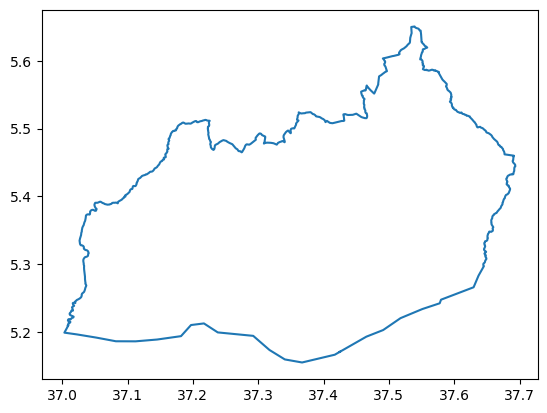

In [119]:
plt.plot(x["line"][0][0],x["line"][0][1])
plt.show()

In [126]:
# Moyale, Ethiopia

# Load the shapefile
shapes_file_name = "Ethiopia_shapes/eth_adm_csa_bofedb_2021_shp/eth_admbnda_adm3_csa_bofedb_2021.shp"
sf = shapefile.Reader(shapes_file_name)

# The name of the region.
name = "Moyale"

# XXX According to Shruti's helper_functions.py
features = sf.shapeRecords()
all_shape_nums = []
for i in range(len(features)):
    if (name in features[i].record[2]):
        all_shape_nums.append(i)

# poly_list = []
polygon_all = []
for shape_num in all_shape_nums:
    print(f"shape_num = {shape_num}")

    # Number of polygons that make up the lake border
    num_polys = len(sf.shape(shape_num).parts)

    # Loop over all polygons in the shapefile
    for poly_num in range(num_polys):
        start_idx = sf.shape(shape_num).parts[poly_num]
        if (poly_num < num_polys-1):
            end_idx = sf.shape(shape_num).parts[poly_num+1]
        else:
            end_idx = None  # Final location is not specified in shape(0).parts.
        polygon = Polygon(sf.shape(shape_num).points[start_idx:end_idx])

        polygon_all.append(polygon)

    # # The points in the shapefile
    # points = np.array(sf.shape(shape_num).points)

    # # Make a list of the polygons
    # for i in range(num_polys-1):
    #     start_idx = sf.shape(shape_num).parts[i]
    #     end_idx = sf.shape(shape_num).parts[i+1]
    #     poly_list.append([points[start_idx:end_idx,0].tolist(), points[start_idx:end_idx,1].tolist()])
    # # Add the final polygon
    # poly_list.append([points[end_idx:,0].tolist(), points[end_idx:,1].tolist()])

# Combine the polygons
polygon = unary_union(polygon_all)
xx, yy = polygon.exterior.coords.xy
poly_list = [[xx.tolist(), yy.tolist()]]

# Get the final bounding box
bbox = [np.min(poly_list[0][0]),np.min(poly_list[0][1]),
        np.max(poly_list[0][0]),np.max(poly_list[0][1])]

# Find the bounding indices
min_lon_idx = np.max(np.nonzero(longitude < bbox[0]))
max_lon_idx = np.min(np.nonzero(longitude > bbox[2]))
min_lat_idx = np.max(np.nonzero(latitude < bbox[1]))
max_lat_idx = np.min(np.nonzero(latitude > bbox[3]))

# Export to .json
x = {
    "name":name,
    "bounding_box":list(bbox),
    "lat_idx":[int(min_lat_idx),int(max_lat_idx)],
    "lon_idx":[int(min_lon_idx),int(max_lon_idx)],
    "line":poly_list
}
#print(json.dumps(x, indent=4))

# Save to a .json text file
json_file = open(f"{output_dir}/{name}_boundary.json", "w")
json_file.write(json.dumps(x))
json_file.close()

shape_num = 557
shape_num = 775


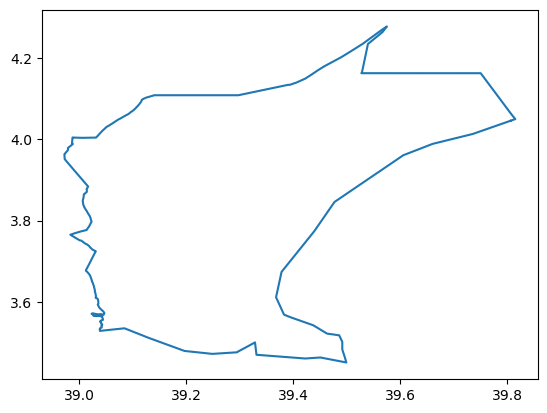

In [128]:
plt.plot(x["line"][0][0],x["line"][0][1])
plt.show()